In [1]:
# Import libraries:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Practical Exercise 4 (Normal distribution, mixture density)

In this exercise, you will learn how to model unknown joint probability distributions $p(x1,x2)$ in order to describe a given dataset. To this end, we will use Normal distributions with independent or dependent components.

As raw data, we use ```data/a.txt``` and ```data/x.txt```, containing $N_a=10.000$ and $N_x=20.000$ two-dimensional data points, respectively, which are stored in two columns.

#### Data set a.txt:

- Start modeling the data set a.mat with a Gaussian distribution with independent components.
- Visualize the data points and superimpose them with the contour image of the Gaussian. 
- Additionally generate a second figure with the 3D mesh of the estimated Gaussian. This mesh represents the joint probability $p(x1,x2)$ (we may also write $p(X)$ with $X=[x1,x2]^t$) in z-direction over the $(x1,x2)$ plane.
- Combine both images into a single figure using the subplot function. Does the distribution represent the data sufficiently good?
- Repeat the described procedure but this time using a Gaussian distribution with dependent components. Do you achieve a better modeling of the data?
- Combine all 4 images into a single overview figure with correct labeling of the axes and a reasonable title.

In [59]:
## Read txt file containing data set a.

# Note: The entries are not uniquely separated. Have only one blank for negative values and two blanks, else.
# Therefore, use one blank as separator, resulting in empty columns, that need to be removed afterwards.
a = pd.read_csv("../../data/sheet4/a.txt", sep=' ', header=None)

# Convert to numpy array:
a = np.array(a)

# Move negative entries to correct column:
a[:,4][np.isnan(a[:,4])] = a[:,3][np.isnan(a[:,4])]

# Keep only desired columns, stack and swap axes to end up with correct dimensions:
a = np.swapaxes(np.stack([a[:,2],a[:,4]]),0,1)

# Check dimensions:
print('dimensions of data set a:',a.shape)

dimensions of data set a: (10000, 2)


In [76]:
## Model data as 2D Gaussian with independent components.

# Get mean and standard deviations seperately for each dimension:
a_mean_x = np.mean(a[:,0])
a_mean_y = np.mean(a[:,1])
a_std_x = np.std(a[:,0])
a_std_y = np.std(a[:,1])

# Get min and max seperately for each dimension:
a_min_x = np.min(a[:,0])
a_min_y = np.min(a[:,1])
a_max_x = np.max(a[:,0])
a_max_y = np.max(a[:,1])

# Print result:
print('data set a:\n===========')
print('mean in x-direction:', np.round(a_mean_x,2))
print('mean in y-direction:', np.round(a_mean_y,2))
print('std. dev. in x-direction:', np.round(a_std_x,2))
print('std. dev. in y-direction:', np.round(a_std_y,2))

data set a:
mean in x-direction: 7.0
mean in y-direction: 4.3
std. dev. in x-direction: 1.74
std. dev. in y-direction: 1.23


In [143]:
# Create mesh grid with respect to given limits in x- and y-direction for samples in data set a:
x, y = np.mgrid[a_min_x:a_max_x:.01, a_min_y:a_max_y:.01]

# Compute corresponding univariate normal distributions:
x_normal_dist = 1 / np.sqrt(2 * np.pi * a_std_x**2) * np.exp(-((x-a_mean_x)**2) / (2 * a_std_x**2))
y_normal_dist = 1 / np.sqrt(2 * np.pi * a_std_y**2) * np.exp(-((y-a_mean_y)**2) / (2 * a_std_y**2))

# Compute joint probability density function as product of two independent distributions:
xy_normal_dist = x_normal_dist * y_normal_dist

In [ ]:
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, xy_normal_dist)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, xy_normal_dist)

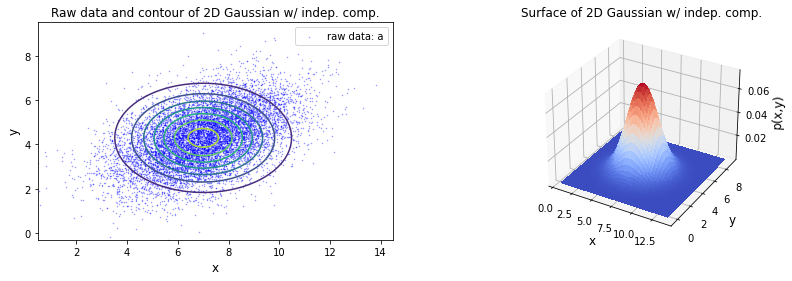

In [180]:
# Initialize plot:
fig = plt.figure(figsize=(14,4))

# Initialize first subplot:
ax1 = fig.add_subplot(121)

# Add scatterplot for raw data in data set a:
ax1.scatter(x=a[:,0], y=a[:,1], c='blue', marker='.', s=1, alpha=0.4, label='raw data: a')

# Add contour plot modelling the data as 2D Gaussian distribution with independent components:
ax1.contour(x, y, xy_normal_dist)

# Add title, label axes and add legend in first subplot:
ax1.set_title('Raw data and contour of 2D Gaussian w/ indep. comp.', fontsize=12)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.legend()

# Initialize second subplot:
ax2 = fig.add_subplot(122, projection='3d')

# Add surface plot modelling the data as 2D Gaussian distribution with independent components:
ax2.plot_surface(x, y, xy_normal_dist, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add title, label axes and add legend in second subplot:
ax2.set_title('Surface of 2D Gaussian w/ indep. comp.', fontsize=12)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_zlabel('p(x,y)', fontsize=12)

plt.show()

#### Discussion of modelling data in data set a as 2D Gaussian distribution with independent components

Modeling the data in data set a using a 2D Gaussian distribution with independent components is not a good choice.
This type of distribution only works in case of statistically independent components, which is obviously violated in our case.